In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy

movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")



In [2]:
movie_rating_counts = ratings.groupby("movieId").size().reset_index(name="rating_count")


movies = movies.merge(movie_rating_counts, on="movieId")


movies = movies.sort_values("rating_count", ascending=False).head(5000).reset_index(drop=True)


In [3]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)


In [5]:
import pandas as pd

# Load datasets (adjust the path if necessary)
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Filter top 2500 movies by number of ratings
popularity = ratings.groupby('movieId').size().reset_index(name='count')
top_movie_ids = popularity.nlargest(2500, 'count')['movieId']

# Filter movies and ratings
filtered_movies = movies[movies['movieId'].isin(top_movie_ids)]
filtered_ratings = ratings[ratings['movieId'].isin(top_movie_ids)]

print("Filtered movies:", filtered_movies.shape)
print("Filtered ratings:", filtered_ratings.shape)


Filtered movies: (2500, 3)
Filtered ratings: (83136, 4)


In [4]:
from sklearn.neighbors import NearestNeighbors

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies["genres"].fillna(""))

model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(tfidf_matrix)

def recommend(title, num_recommendations=3):
    if title not in movies['title'].values:
        return ["Title not found."]
    
    idx = movies[movies['title'] == title].index[0]
    distances, indices = model.kneighbors(tfidf_matrix[idx], n_neighbors=num_recommendations+1)
    
    recommended_indices = indices.flatten()[1:]  # exclude the input itself
    return movies.iloc[recommended_indices]["title"].tolist()


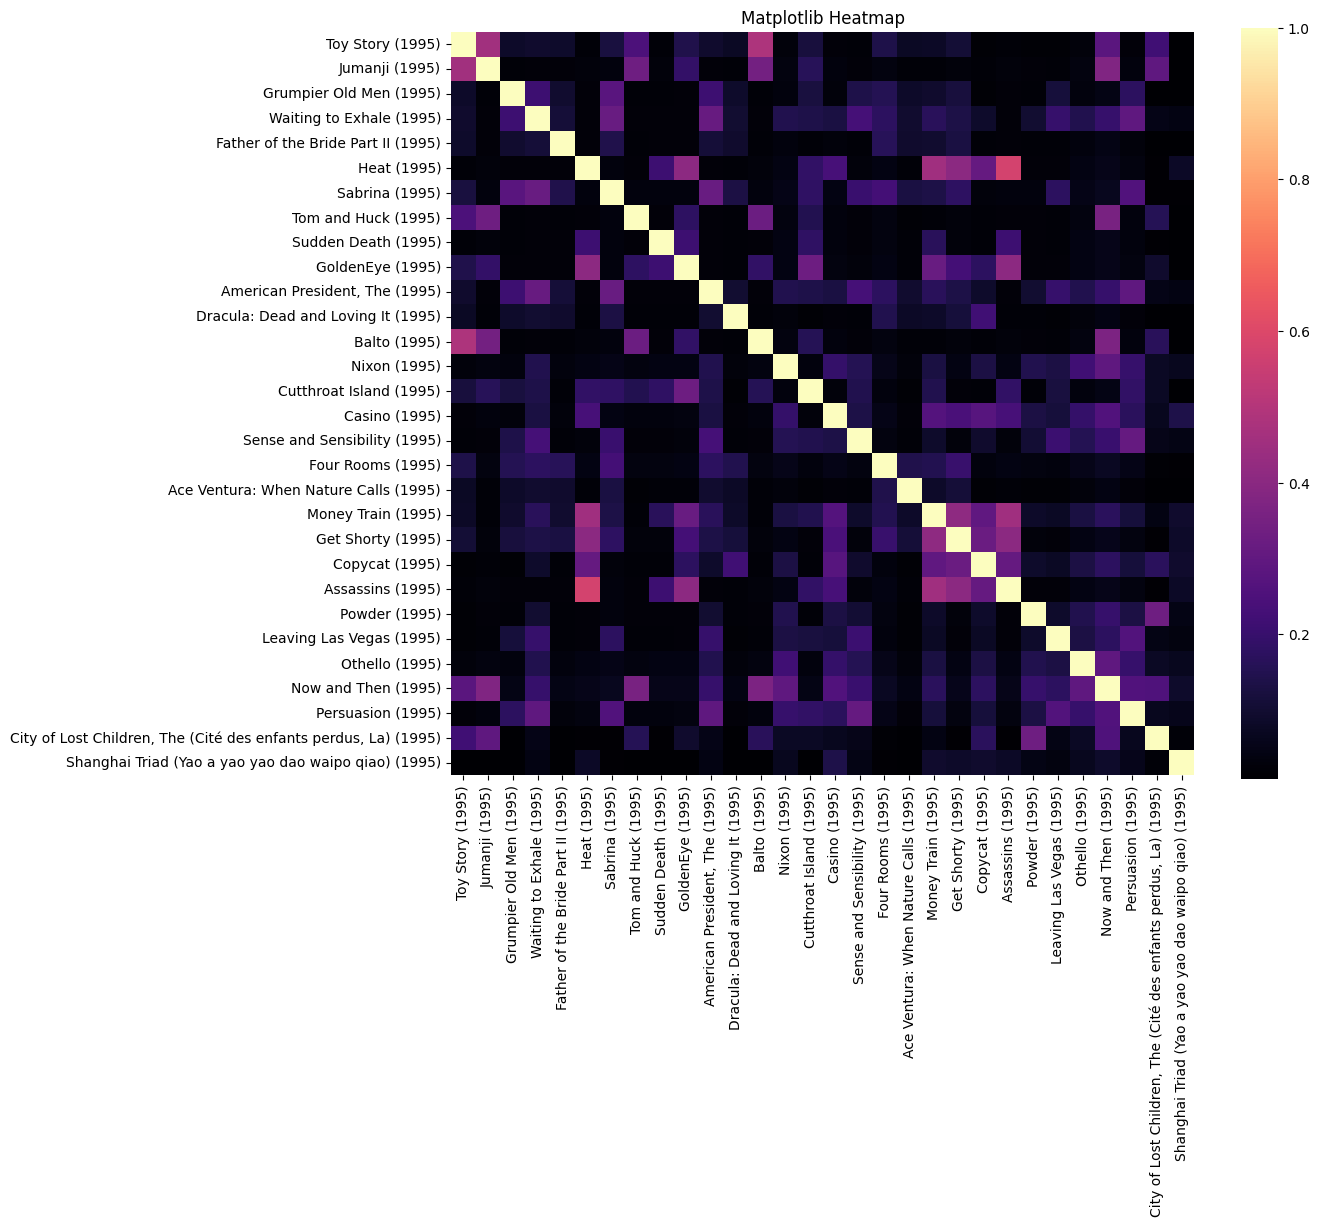

In [6]:
# Sample only 30 movies to prevent performance issues
sample_movies = movies.head(30).copy()

# Compute content similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

sample_movies['content'] = sample_movies['title'] + " " + sample_movies['genres']
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(sample_movies['content'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# --- Plot 1: Plotly Heatmap ---
import plotly.express as px
fig1 = px.imshow(
    cosine_sim,
    x=sample_movies['title'],
    y=sample_movies['title'],
    labels={'x': 'Movie Titles', 'y': 'Movie Titles'},
    title="Plotly Interactive Heatmap"
)
fig1.show()

# --- Plot 2: Matplotlib + Seaborn Heatmap ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 12))
sns.heatmap(cosine_sim, xticklabels=sample_movies['title'], yticklabels=sample_movies['title'], cmap="magma", square=True)
plt.title("Matplotlib Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Recommendations for 'Toy Story (1995)': ['Antz (1998)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)']


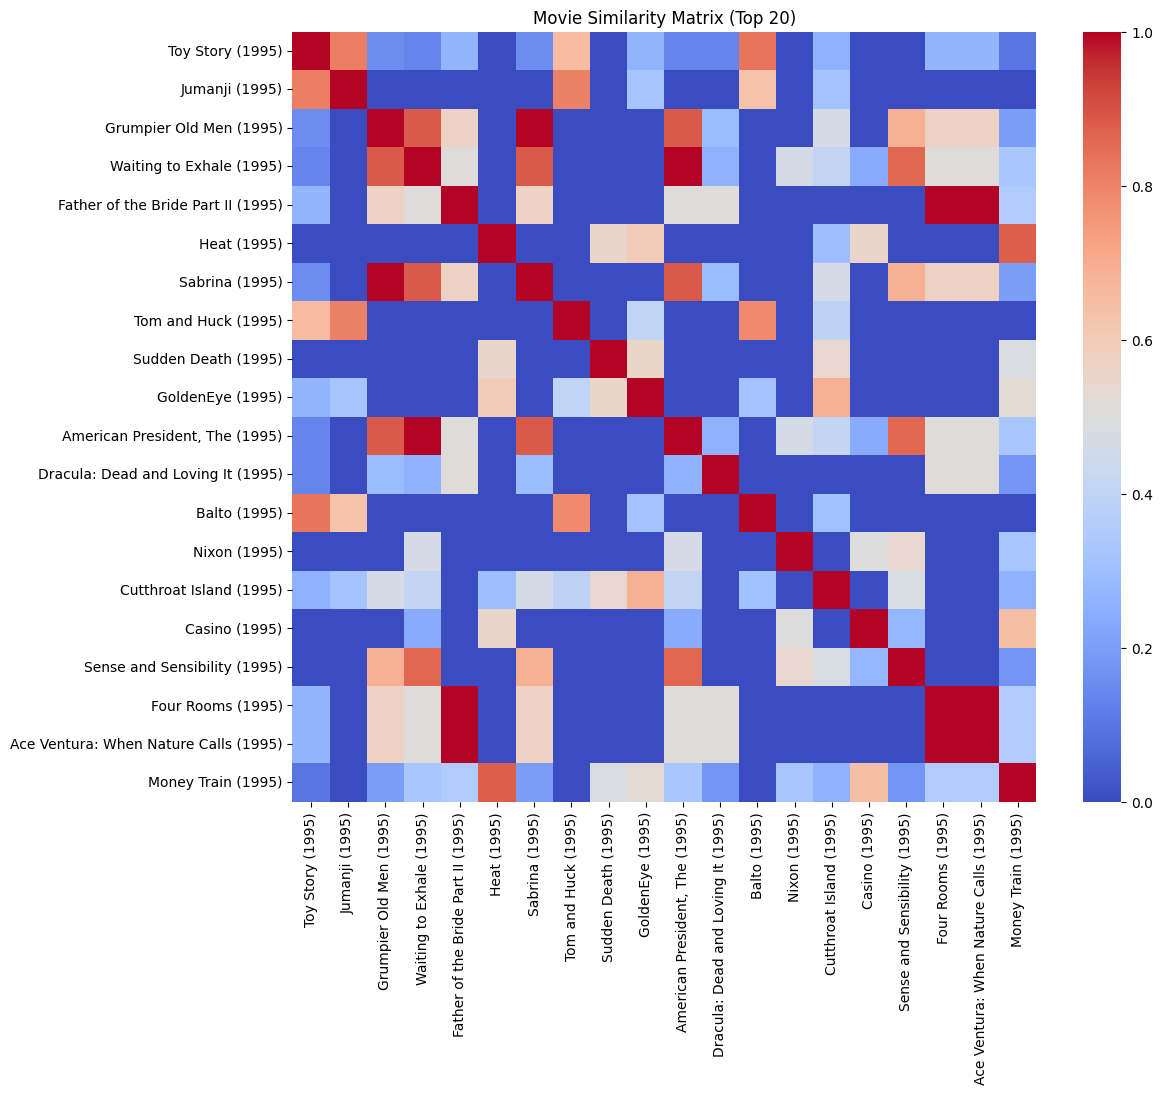

In [10]:
#190K MOVIES
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")

# Use all movies without filtering
movies["content"] = movies["genres"]

# Create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies["content"])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Build title to index mapping
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

# Recommendation function
def recommend(title, num_recommendations=3):
    if title not in indices:
        return ["Title not found."]
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices].tolist()

# Example
print("Recommendations for 'Toy Story (1995)':", recommend("Toy Story (1995)"))

# Plot similarity matrix for top 20 only (for visualization purposes)
plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim[:20, :20],
            xticklabels=movies['title'].iloc[:20],
            yticklabels=movies['title'].iloc[:20],
            cmap="coolwarm")
plt.title("Movie Similarity Matrix (Top 20)")
plt.show()


C:\Users\vince\AppData\Local\Temp\ipykernel_15484\132734123.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recommendations for 'Toy Story (1995)': ['Antz (1998)', 'Toy Story 2 (1999)', 'Adventures of Rocky and Bullwinkle, The (2000)']


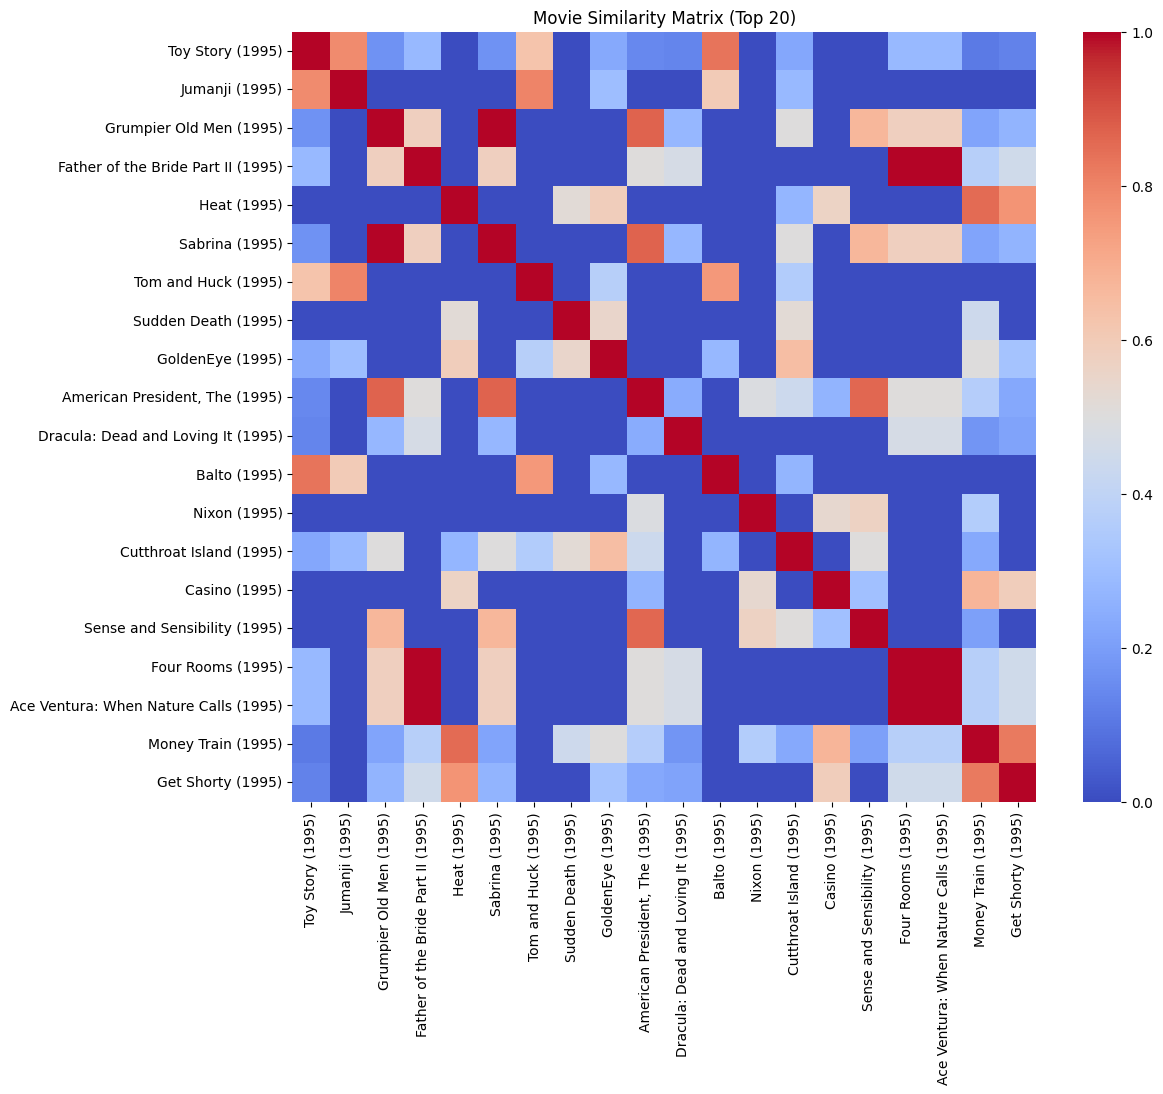

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv("ml-latest-small/movies.csv")
ratings = pd.read_csv("ml-latest-small/ratings.csv")

popularity = ratings.groupby('movieId').size().reset_index(name='count')
top_movie_ids = popularity.nlargest(2500, 'count')['movieId']
filtered_movies = movies[movies['movieId'].isin(top_movie_ids)]

filtered_movies["content"] = filtered_movies["genres"]

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(filtered_movies["content"])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(filtered_movies.index, index=filtered_movies['title']).drop_duplicates()

def recommend(title, num_recommendations=3):
    if title not in indices:
        return ["Title not found."]
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return filtered_movies['title'].iloc[movie_indices].tolist()

print("Recommendations for 'Toy Story (1995)':", recommend("Toy Story (1995)"))

plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim[:20, :20], xticklabels=filtered_movies['title'].iloc[:20], yticklabels=filtered_movies['title'].iloc[:20], cmap="coolwarm")
plt.title("Movie Similarity Matrix (Top 20)")
plt.show()


In [8]:
if 'description' in movies.columns:
    movies["content"] = movies["description"] + " " + movies["genres"]
else:
    movies["content"] = movies["genres"]

In [9]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_features=5000)
tfidf_matrix = tfidf.fit_transform(movies["content"])

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

movies['content'] = movies['title'] + " " + movies['genres']

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['content'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [11]:
def plot_similar_heatmap(title, min_similarity=0.2, top_n=10):
    if title not in indices:
        print(f"'{title}' not found in dataset.")
        return

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter based on minimum similarity
    filtered_scores = [(i, score) for i, score in sim_scores if score >= min_similarity and i != idx]

    # Limit to top N results
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Make sure indices are within bounds of filtered_movies
    max_index = len(filtered_movies) - 1
    selected_indices = [idx] + [i for i, _ in filtered_scores if i <= max_index]

    # Extra safety: drop any duplicates
    selected_indices = list(dict.fromkeys(selected_indices))

    # Get corresponding titles
    selected_titles = filtered_movies.iloc[selected_indices]['title'].tolist()

    # Build similarity matrix for those movies
    filtered_sim = cosine_sim[selected_indices][:, selected_indices]

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        filtered_sim,
        xticklabels=selected_titles,
        yticklabels=selected_titles,
        cmap="coolwarm",
        annot=True,
        fmt=".2f"
    )
    plt.title(f"Heatmap of Movies Similar to '{title}'")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



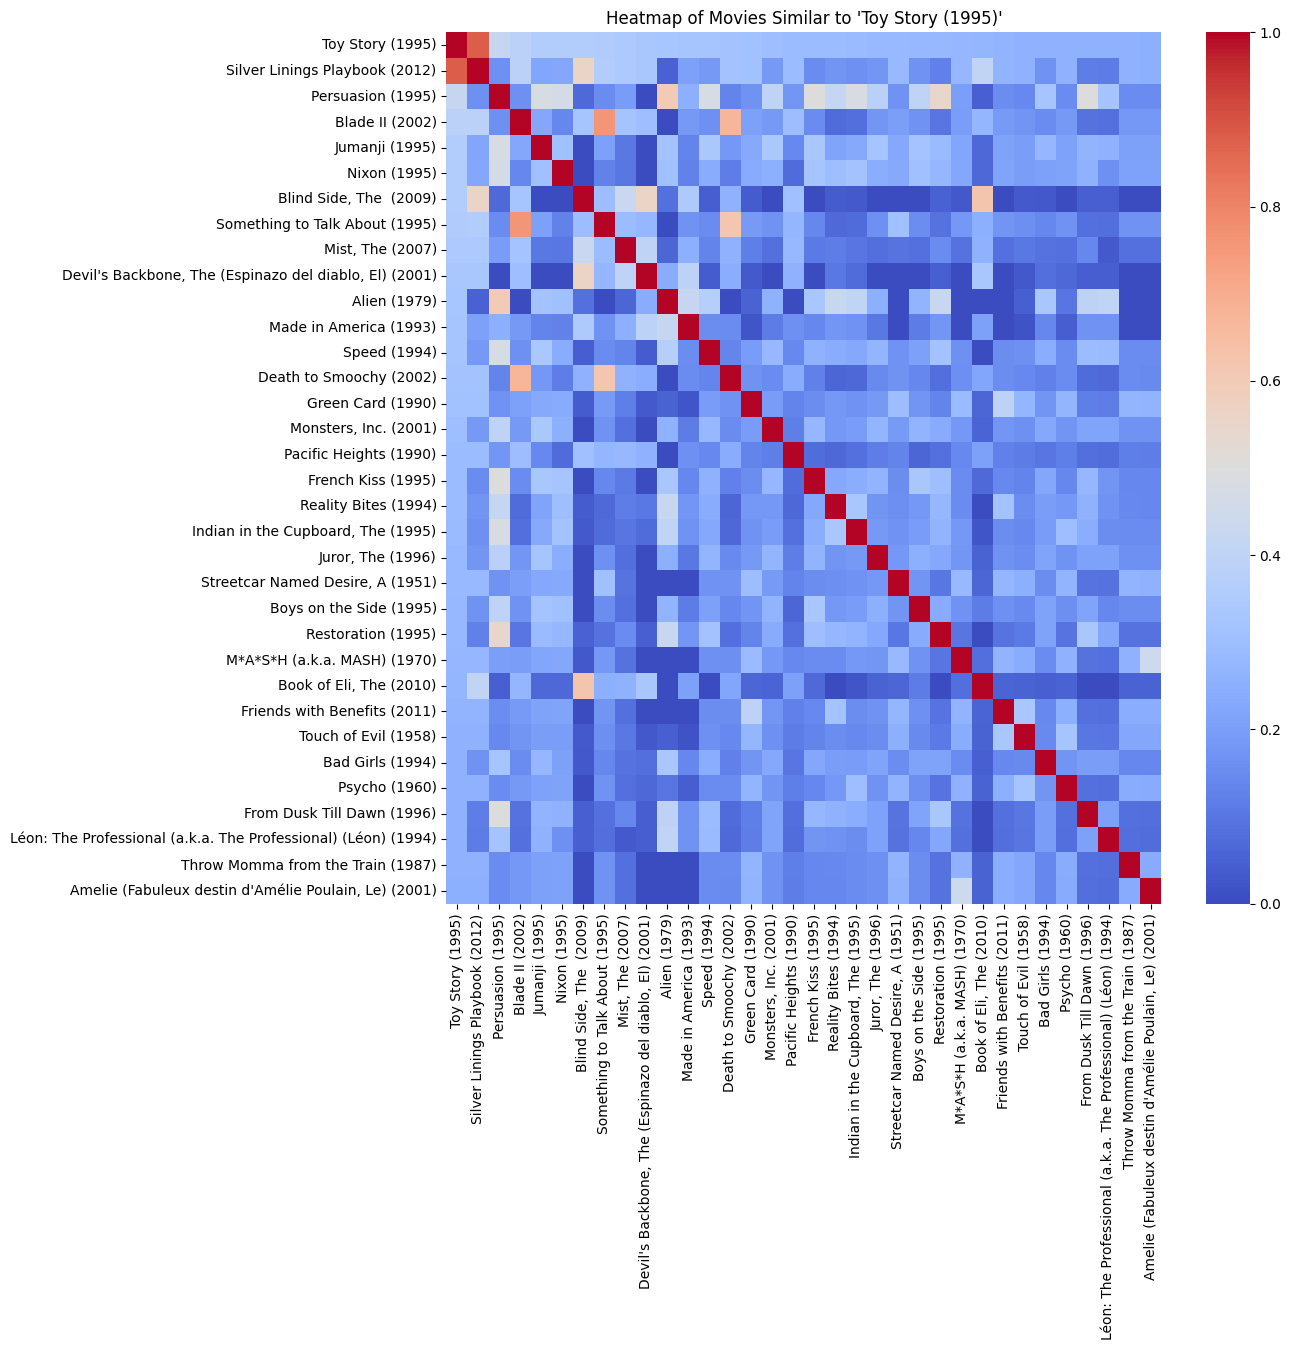

In [19]:
#adjust topn for number of movies
plot_similar_heatmap("Toy Story (1995)", min_similarity=0.25, top_n=100)


In [18]:
#run if heatmap got cramped
def plot_similar_heatmap(title, min_similarity=0.2, top_n=30):
    if title not in indices:
        print(f"'{title}' not found in dataset.")
        return

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))

    filtered_scores = [(i, score) for i, score in sim_scores if score >= min_similarity and i != idx]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)[:top_n]

    max_index = len(filtered_movies) - 1
    selected_indices = [idx] + [i for i, _ in filtered_scores if i <= max_index]
    selected_indices = list(dict.fromkeys(selected_indices))

    selected_titles = filtered_movies.iloc[selected_indices]['title'].tolist()
    filtered_sim = cosine_sim[selected_indices][:, selected_indices]

    #Autoscale figure size based on number of movies
    n = len(selected_titles)
    figsize = max(8, n * 0.4)

    plt.figure(figsize=(figsize, figsize))
    sns.heatmap(
        filtered_sim,
        xticklabels=selected_titles,
        yticklabels=selected_titles,
        cmap="coolwarm",
        annot=False
    )
    plt.title(f"Heatmap of Movies Similar to '{title}'")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
